1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

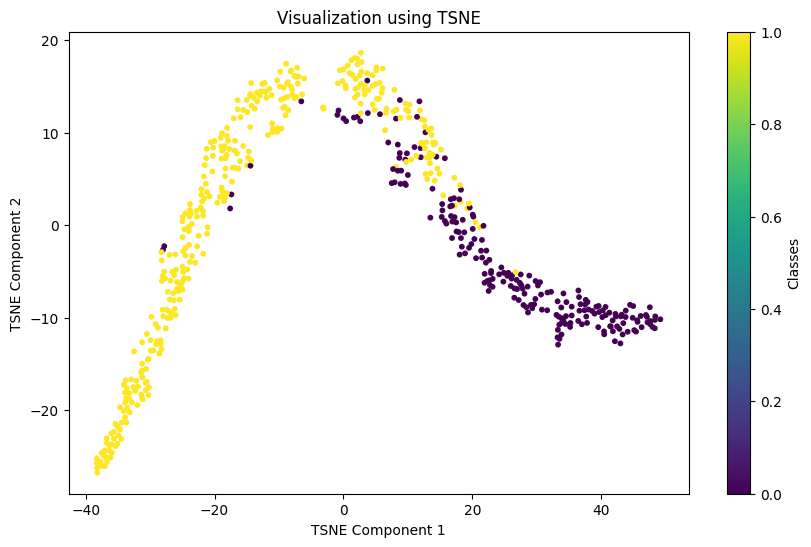

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis', s=10)
plt.title("Visualization using TSNE")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(label="Classes")
plt.show()



3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [ ]:
from sklearn.tree import DecisionTreeClassifier

parameters_dt = [
    {"max_depth": 3, "min_samples_split": 2},
    {"max_depth": 5, "min_samples_split": 2},
    {"max_depth": 5, "min_samples_split": 5},
    {"max_depth": 10, "min_samples_split": 2},
    {"max_depth": 10, "min_samples_split": 10}
]

results_dt = []

for params in parameters_dt:
    model = DecisionTreeClassifier(max_depth=params["max_depth"], min_samples_split=params["min_samples_split"], random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    results_dt.append({"params": params, "accuracy": accuracy})

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters_rf = [
    {"n_estimators": 50, "max_depth": 5},
    {"n_estimators": 100, "max_depth": 5},
    {"n_estimators": 100, "max_depth": 10},
    {"n_estimators": 200, "max_depth": 10},
    {"n_estimators": 200, "max_depth": None}
]

results_rf = []

for params in parameters_rf:
    model = RandomForestClassifier(n_estimators=params["n_estimators"], max_depth=params["max_depth"], random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    results_rf.append({"params": params, "accuracy": accuracy})

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

parameters_ab = [
    {"n_estimators": 50, "learning_rate": 0.1},
    {"n_estimators": 100, "learning_rate": 0.1},
    {"n_estimators": 100, "learning_rate": 0.5},
    {"n_estimators": 200, "learning_rate": 0.5},
    {"n_estimators": 200, "learning_rate": 1.0}
]

results_ab = []

for params in parameters_ab:
    model = AdaBoostClassifier(n_estimators=params["n_estimators"], learning_rate=params["learning_rate"], random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    results_ab.append({"params": params, "accuracy": accuracy})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Decision Tree Evaluation:")
evaluate_model(DecisionTreeClassifier(**parameters_dt[0]).fit(X_train, y_train), X_test, y_test)

print("\nRandom Forest Evaluation:")
evaluate_model(RandomForestClassifier(**parameters_rf[0]).fit(X_train, y_train), X_test, y_test)

print("\nAdaBoost Evaluation:")
evaluate_model(AdaBoostClassifier(**parameters_ab[0]).fit(X_train, y_train), X_test, y_test)


Decision Tree Evaluation:
Accuracy: 0.9649122807017544
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1-Score: 0.9724770642201835
Confusion Matrix:
 [[ 59   4]
 [  2 106]]

Random Forest Evaluation:
Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1-Score: 0.9771689497716894
Confusion Matrix:
 [[ 59   4]
 [  1 107]]

AdaBoost Evaluation:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9590643274853801
Precision: 0.963302752293578
Recall: 0.9722222222222222
F1-Score: 0.967741935483871
Confusion Matrix:
 [[ 59   4]
 [  3 105]]


In [ ]:
!pip install fpdf
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Decision Tree Results:", ln=True)
for result in results_dt:
    pdf.cell(200, 10, txt=f"Params: {result['params']}, Accuracy: {result['accuracy']:.4f}", ln=True)

pdf.cell(200, 10, txt="Random Forest Results:", ln=True)
for result in results_rf:
    pdf.cell(200, 10, txt=f"Params: {result['params']}, Accuracy: {result['accuracy']:.4f}", ln=True)

pdf.cell(200, 10, txt="AdaBoost Results:", ln=True)
for result in results_ab:
    pdf.cell(200, 10, txt=f"Params: {result['params']}, Accuracy: {result['accuracy']:.4f}", ln=True)

pdf.output("Hosam_Ali_hyperparams.pdf")

from google.colab import files
files.download("Hosam_Ali_hyperparams.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>